In [1]:
'''Clear out temporary variables and get a clean session'''
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
import pandas as pd
import pickle
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve


from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
'''Open pickled file'''
with open('ib_ml_df.pkl', 'rb') as f:
    ib_df = pickle.load(f)
    
with open('magnet_ml_df.pkl', 'rb') as f:
    magnet_df = pickle.load(f)

In [4]:
'''Retain relevant columns'''
drop_list = ['program_IB', 'admit_decision_ax', 'admit_decision_rj', 'admit_offer_accepted_no', 'admit_offer_accepted_yes', 
              'student_category', 'program_Magnet', 'lasid', 'program_admit']
ib_df.drop(drop_list, axis = 1, inplace = True)

<AxesSubplot:>

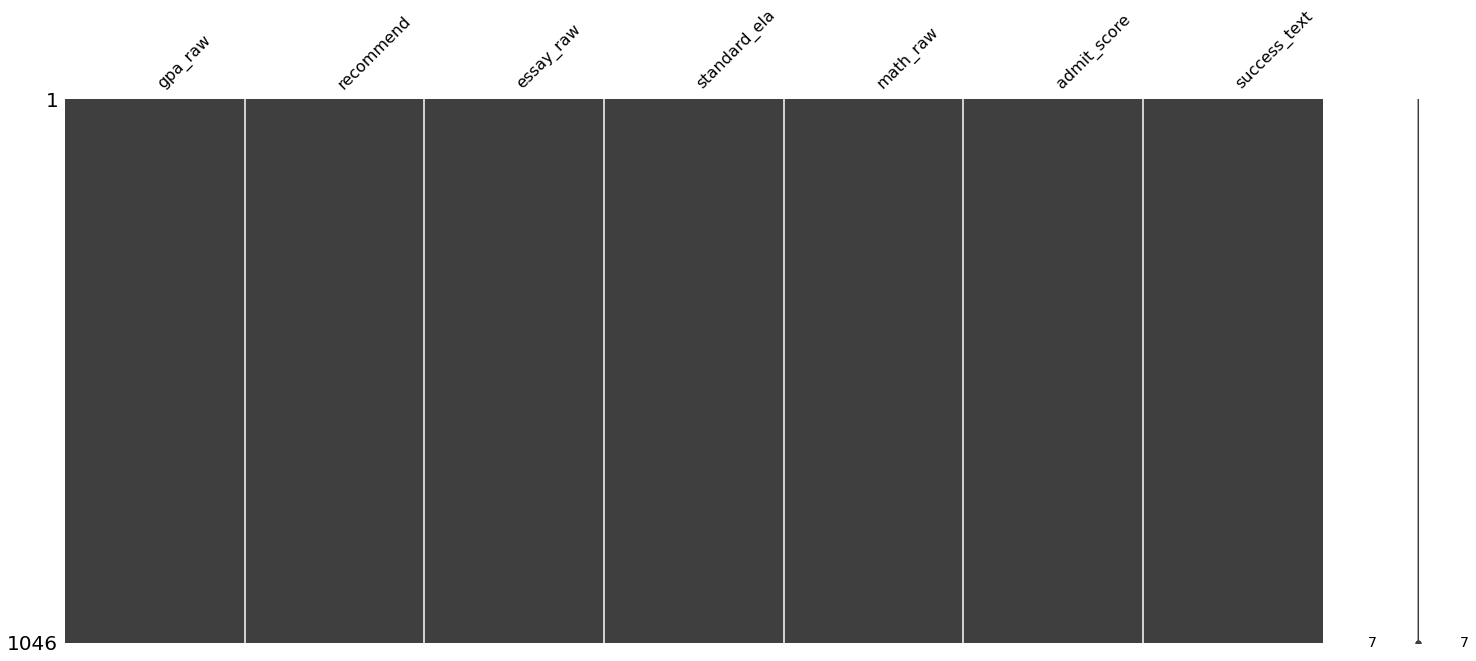

In [5]:
msno.matrix(ib_df)

In [6]:
for i in range(3):
    temp = ib_df
    ib_df = pd.concat([ib_df, ib_df])

<AxesSubplot:>

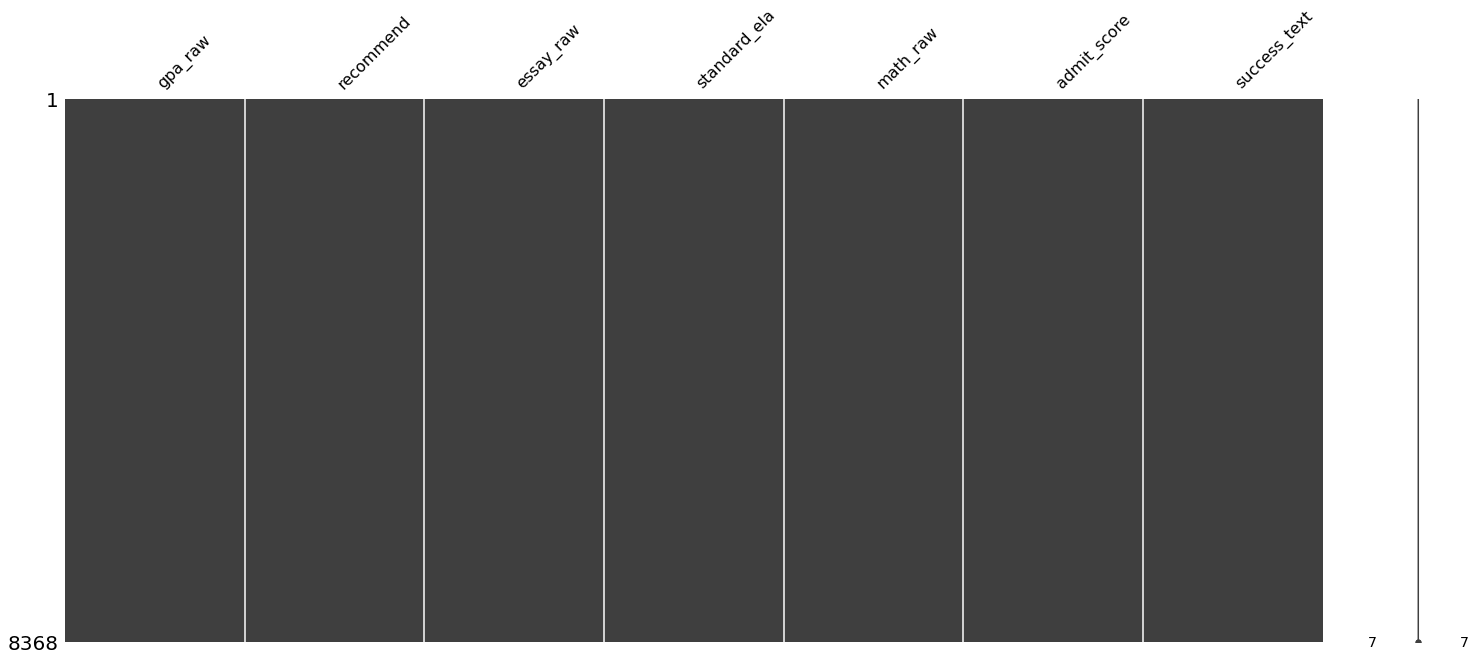

In [7]:
msno.matrix(ib_df)

In [8]:
'''Retain relevant columns'''
drop_list = ['program_IB', 'admit_decision_ax', 'admit_decision_rj','admit_offer_accepted_no', 'admit_offer_accepted_yes',
             'gpa_converted', 'gpa_weighted',  'recommend_weighted', 'student_category', 'math_converted', 'math_weighted', 
             'program_admit', 'lasid', 'full_name_x', 'full_name_y', 'aspen_name', 'similarity', 'program_Magnet']

magnet_df.drop(drop_list, axis = 1, inplace=True)

In [9]:
for i in range(2):
    temp = magnet_df
    magnet_df = pd.concat([magnet_df, magnet_df])

<AxesSubplot:>

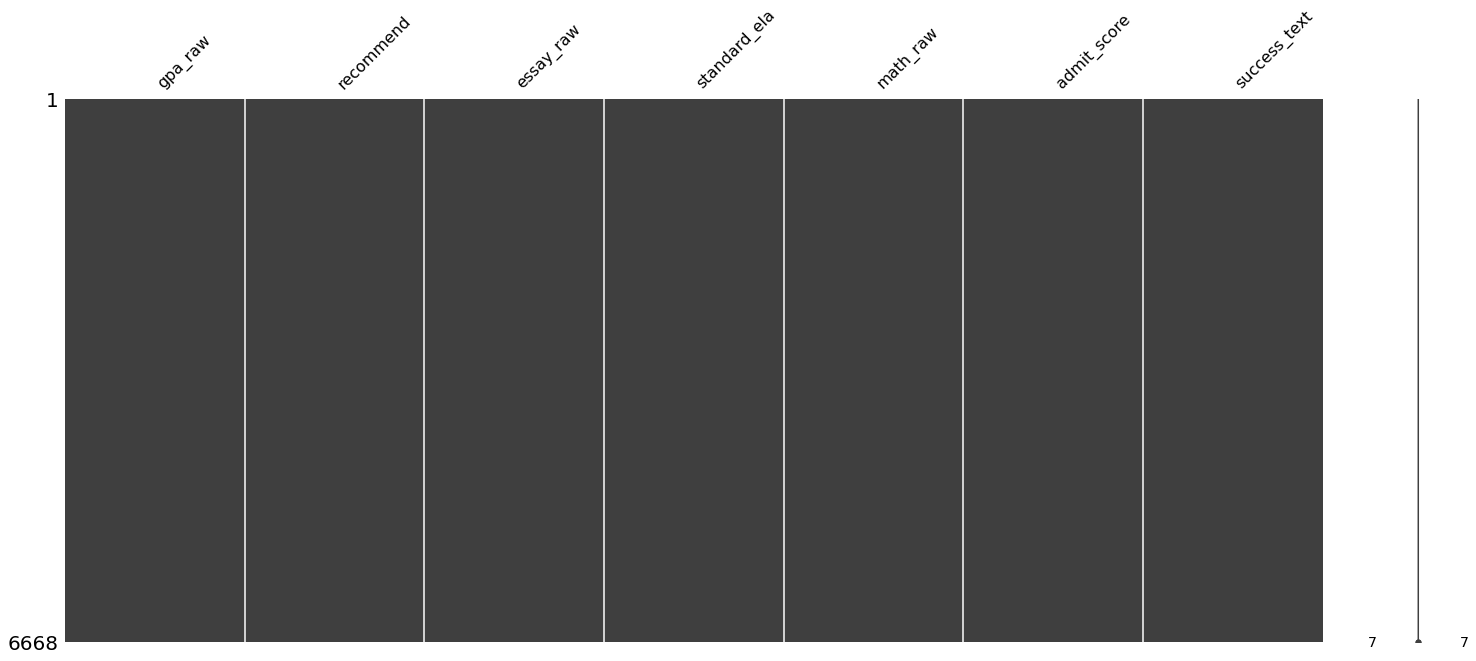

In [10]:
msno.matrix(magnet_df)

In [11]:
'''Function to retain relevant dataframe rows'''
def retain_relevent(df):
    df = df.loc[(df['success_text'] == 'Unsuccessful') | (df['success_text'] == 'Successful Completion')]
    return df

In [12]:
magnet_df = retain_relevent(magnet_df)
ib_df = retain_relevent(ib_df)

In [13]:
ib_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text
0,0.474797,0.512650,-0.974678,0.833438,0.432872,0.467957,Unsuccessful
1,-0.232809,0.233062,1.563612,1.123765,0.716924,0.420625,Unsuccessful
2,-1.148483,-1.048867,0.746869,1.123765,1.566712,-0.465263,Unsuccessful
3,-1.648680,-1.437284,-0.974678,-1.381791,-0.671867,-0.947218,Unsuccessful
4,0.960164,1.143712,0.746869,2.143121,0.183988,1.099779,Successful Completion
...,...,...,...,...,...,...,...
1706,-1.772463,-2.019796,-1.442595,-1.450911,-1.095893,-1.373821,Successful Completion
2198,-1.808207,-0.015230,-1.433599,-1.214344,-0.166043,-1.375297,Unsuccessful
2567,-0.791755,-2.107592,-1.727806,-0.482822,-1.063722,-1.508373,Unsuccessful
2611,0.122531,0.945201,-0.674247,-0.646860,0.298045,-0.865428,Unsuccessful


In [14]:
magnet_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text
46,1.883783,1.324729,0.771228,0.504843,1.973812,1.849077,Unsuccessful
47,0.602581,0.525293,-0.913868,0.504843,1.138698,0.498953,Unsuccessful
48,-1.000847,-1.267198,0.771228,0.087910,0.574230,-0.104172,Unsuccessful
50,-1.337670,-0.293408,0.771228,-1.242446,-0.167623,-0.536864,Unsuccessful
51,-0.051702,-1.613741,-0.002435,-0.523249,-0.250194,-0.483132,Unsuccessful
...,...,...,...,...,...,...,...
2624,1.240404,0.945201,0.008638,0.007978,0.936367,1.541632,Unsuccessful
2627,0.939156,0.671404,0.008638,0.007978,0.438191,1.504134,Unsuccessful
2630,0.987805,0.155159,0.008638,0.007978,0.494624,1.430180,Unsuccessful
2631,0.987805,0.045610,0.008638,0.007978,0.494624,1.411038,Unsuccessful


### IB Supervised Model Analysis

In [ ]:
'''Label encode success column'''
le = LabelEncoder()
ib_df['success'] = le.fit_transform(ib_df['success_text'])
le.classes_

In [ ]:
'''Make 0=Unsuccessful and 1=Successful'''
ib_df.loc[ib_df['success'] == 1, 'success'] = 10
ib_df.loc[ib_df['success'] == 0, 'success'] = 1
ib_df.loc[ib_df['success'] == 10, 'success'] = 0

In [ ]:
ib_df['success_text'].value_counts()

In [ ]:
'''Since the target variable is imbalanced, we will utilize the SMOTE algorithm to balance the sample'''
X = ib_df.drop(['success_text', 'success'], axis = 1)
y = ib_df['success']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['success'])

'''Check the numbers in the oversampled data'''
print("Length of oversampled data is: ",len(os_data_X))
print("Number of successes in oversampled data:",len(os_data_y[os_data_y['success']==0]))
print("Number of non-successes in oversampled data:",len(os_data_y[os_data_y['success']==1]))
print("Proportion of success data in oversampled data is: ",len(os_data_y[os_data_y['success']==0])/len(os_data_X))
print("Proportion of non-success data in oversampled data is ",len(os_data_y[os_data_y['success']==1])/len(os_data_X))

In [ ]:
'''Train Test Split'''
X = os_data_X
y = os_data_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

In [ ]:
'''Initialze the estimators'''
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [ ]:
'''Initiaze the hyperparameters for each dictionary'''
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [ ]:
'''Create pipeline and parameters for GridSearchCV'''
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [ ]:
%%time
'''Train and time the GridSearch model'''
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train.values.ravel())

In [ ]:
'''Best performing model and its corresponding hyperparameters'''
gs.best_params_

In [ ]:
'''ROC-AUC score for the best model'''
gs.best_score_

In [ ]:
'''Plot ROC Curve'''
fpr, tpr, thresh = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)

'''Plot roc curves'''
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')   

'''Title'''
plt.title('ROC curve')

'''x and y label'''
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
'''Test data performance'''
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

In [ ]:
importances = gs.best_estimator_[0].feature_importances_
forest_importances = pd.Series(importances, index=X.columns.values)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(confusion_matrix(gs.predict(X_test), y_test, labels = [0,1]))

In [ ]:
print(classification_report(y_test, gs.predict(X_test)))

### Magnet Supervised Model Analysis

In [15]:
'''Label encode success column'''
le = LabelEncoder()
magnet_df['success'] = le.fit_transform(magnet_df['success_text'])
le.classes_

array(['Successful Completion', 'Unsuccessful'], dtype=object)

In [16]:
'''Make 0=Unsuccessful and 1=Successful'''
magnet_df.loc[magnet_df['success'] == 1, 'success'] = 10
magnet_df.loc[magnet_df['success'] == 0, 'success'] = 1
magnet_df.loc[magnet_df['success'] == 10, 'success'] = 0

In [17]:
magnet_df['success_text'].value_counts()

Unsuccessful             740
Successful Completion    632
Name: success_text, dtype: Int64

In [18]:
'''Train Test Split'''
X = magnet_df.drop(['success_text', 'success'], axis = 1)
y = magnet_df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(1097, 6)
(275, 6)


In [19]:
'''Initialze the estimators'''
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [20]:
'''Initiaze the hyperparameters for each dictionary'''
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [21]:
'''Create pipeline and parameters for GridSearchCV'''
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [22]:
%%time
'''Train and time the GridSearch model'''
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train.values.ravel())

C:\Users\scott\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
69 fits failed out of a total of 528.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\scott\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\scott\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\scott\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty,

Wall time: 10.6 s


In [23]:
'''Best performing model and its corresponding hyperparameters'''
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

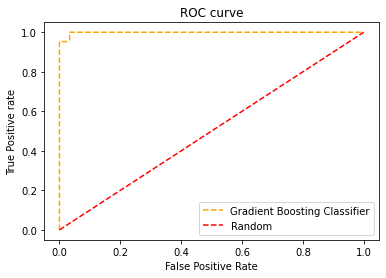

In [29]:
'''Plot ROC Curve'''
fpr, tpr, thresh = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)

'''Plot roc curves'''
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random') 

'''Title'''
plt.title('ROC curve')

'''x and y label'''
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [25]:
gs.best_score_

0.9904030118627282

In [26]:
'''Test data performance'''
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.9636363636363636
Test Precision: 0.952755905511811
Test Recall: 0.968
Test ROC AUC Score: 0.964


In [27]:
print(confusion_matrix(gs.predict(X_test), y_test, labels = [0,1]))

[[144   6]
 [  4 121]]


In [28]:
print(classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       148
           1       0.97      0.95      0.96       127

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275

